# 1. Organizing Images

In [1]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import load_img

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import choice 

import os
os.chdir('C:/Users/louis/Desktop/03MyProjects/ITE_UIUC_Engineering_Open_House_2023')
import glob
from skimage.io import imread

import warnings
warnings.filterwarnings("ignore")

In [2]:
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
v6 = []
v7 = []
v8 = []

In [3]:
for classes in os.listdir('buses'):
    route = 'buses/'+classes+'/'
    for path in os.listdir(route):
        if classes == 'ADA':
            v1.append(route+path)
        elif classes == 'D60LF':
            v2.append(route+path)
        elif classes == 'DE40':
            v3.append(route+path)
        elif classes == 'DE60':
            v4.append(route+path)
        elif classes == 'MAIN':
            v5.append(route+path)
        elif classes == 'XDE40':
            v6.append(route+path)
        elif classes == 'XDE60':
            v7.append(route+path)
        elif classes == 'XHE60':
            v8.append(route+path)

In [6]:
num_files = np.sum([len(v1),len(v2),len(v3),len(v4),len(v5),len(v6),len(v7),len(v8)])
print(f'Number of files: {num_files}')

Number of files: 158


# 2. Exploratory Data Analysis

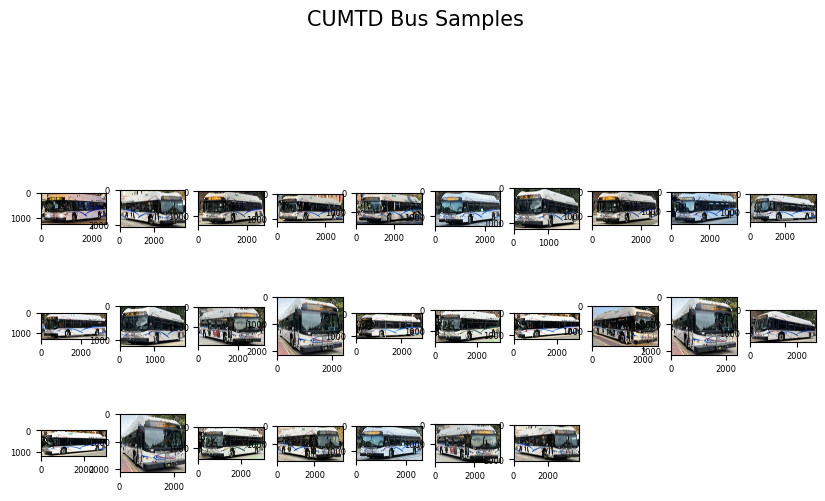

In [8]:
fig,axes = plt.subplots(figsize=(10,15))
random_image = [choice(v3)for x in range(0,len(v3))]

for i in range(0,len(random_image)):
    img = imread(random_image[i])
    plt.imshow(img)
    axes =plt.subplot(10,10,i+1)
    axes.tick_params(axis='both', which='major', labelsize=6)
    axes.tick_params(axis='both', which='minor', labelsize=6)
    
fig.delaxes(axes)
fig.suptitle('CUMTD Bus Samples',fontsize=15)
plt.show() 

counter: 1


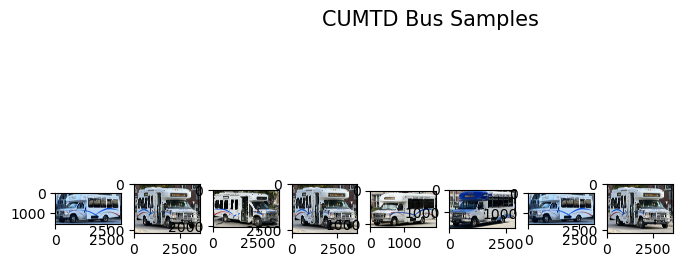

counter: 2


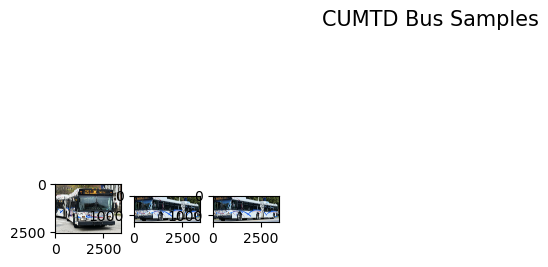

counter: 3


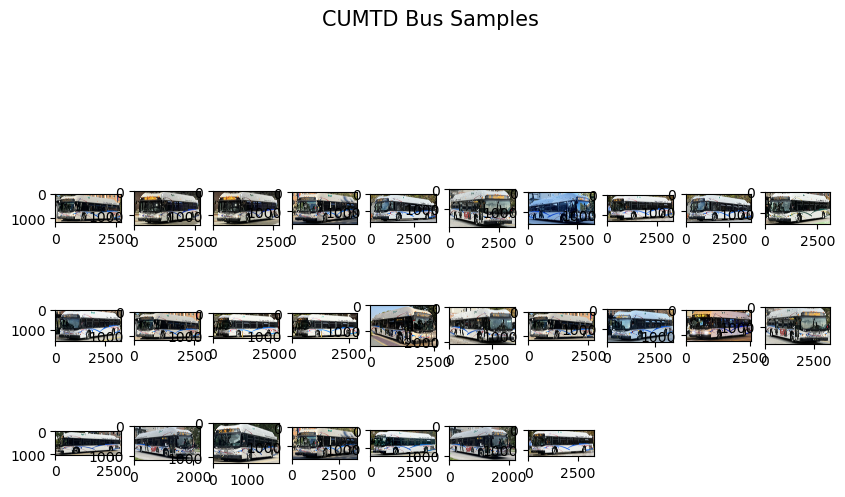

counter: 4


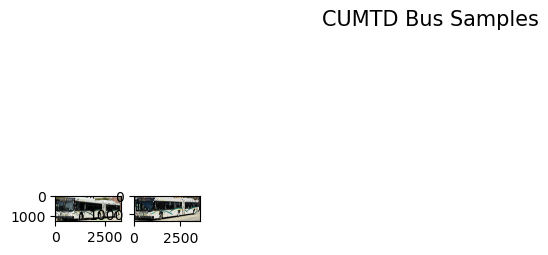

counter: 5


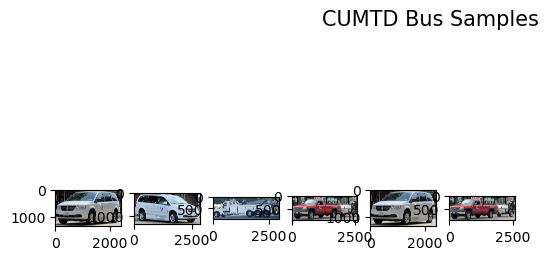

counter: 6


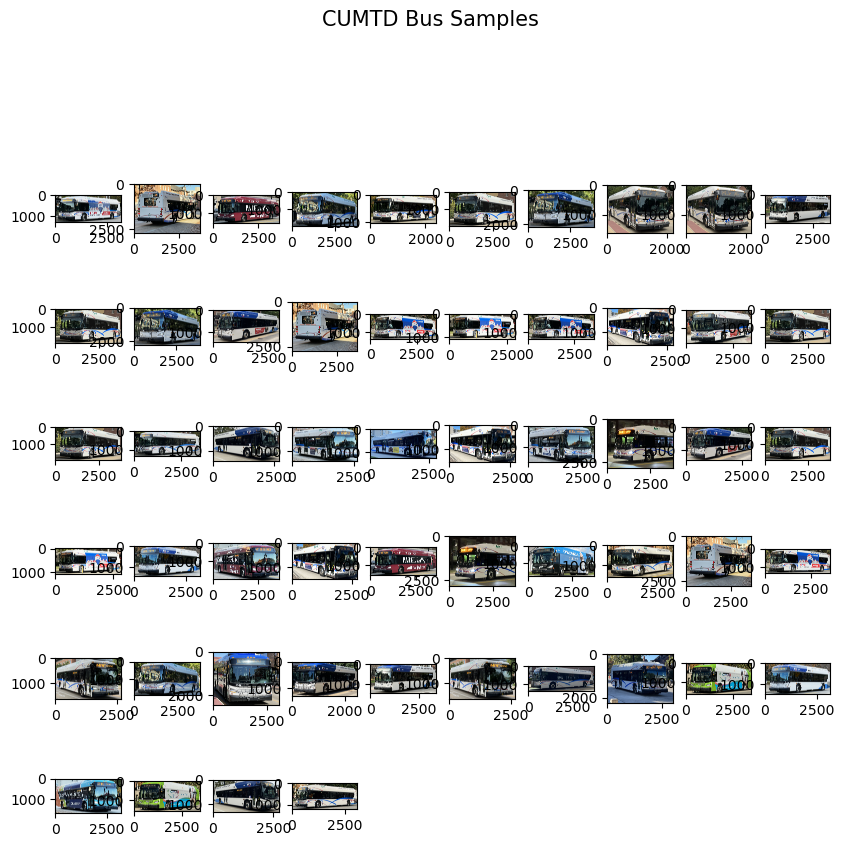

counter: 7


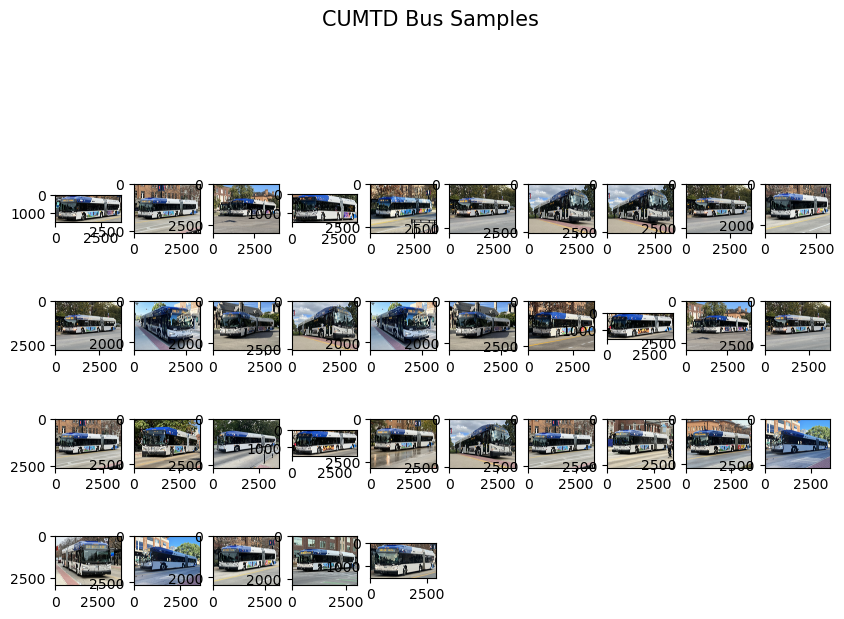

counter: 8


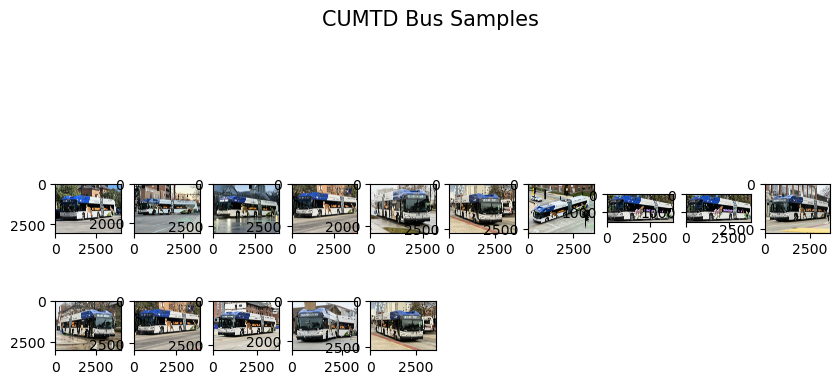

In [9]:
from random import choice 
V = [v1,v2,v3,v4,v5,v6,v7,v8]
counter = 1
for v in V:
    print(f'counter: {counter}')
    counter+=1
    fig,axes = plt.subplots(figsize=(10,15))
    random_image = [choice(v)for x in range(0,len(v))] 
    for i in range(0,len(random_image)):
        img = imread(random_image[i])
        plt.imshow(img)
        axes =plt.subplot(10,10,i+1)
    fig.delaxes(axes)
    fig.suptitle('CUMTD Bus Samples',fontsize=15)
    plt.show() 

# 3. Create Training and Testing Image Datasets

In [10]:
batch_size = 32 #batch size is a number of samples processed before the model is updated
img_height = 180 #height of our image
img_width = 180 #width of our image

In [11]:
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'buses',
    validation_split=0.2, #training and testing images are split around 80-20%
    subset="training", #we are going to 'train' these datasets
    seed=123, #random seed number
    image_size=(img_height, img_width), #adjust the image size
    batch_size=batch_size) #given batch size

Found 158 files belonging to 8 classes.
Using 127 files for training.


In [12]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
  'buses',
    validation_split=0.2,
    subset="validation", #we are going to 'test' these datasets
    seed=123, #random seed number
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 158 files belonging to 8 classes.
Using 31 files for validation.


In [13]:
AUTOTUNE = tf.data.AUTOTUNE
training_data = training_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

# 4. CNN Model Creation

In [15]:
num_classes = 8
epochs = 20
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes, activation='softmax'),
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [17]:
model_history = model.fit(
  training_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/20
4/4 [==============================] - 7s 800ms/step - loss: 2.0570 - accuracy: 0.3228 - val_loss: 1.7703 - val_accuracy: 0.3871
Epoch 2/20
4/4 [==============================] - 2s 560ms/step - loss: 1.8523 - accuracy: 0.3386 - val_loss: 1.7587 - val_accuracy: 0.3871
Epoch 3/20
4/4 [==============================] - 2s 586ms/step - loss: 1.7714 - accuracy: 0.3386 - val_loss: 1.6797 - val_accuracy: 0.3871
Epoch 4/20
4/4 [==============================] - 2s 564ms/step - loss: 1.7376 - accuracy: 0.3386 - val_loss: 1.6692 - val_accuracy: 0.3871
Epoch 5/20
4/4 [==============================] - 2s 576ms/step - loss: 1.6984 - accuracy: 0.3386 - val_loss: 1.6546 - val_accuracy: 0.3871
Epoch 6/20
4/4 [==============================] - 2s 584ms/step - loss: 1.6605 - accuracy: 0.3386 - val_loss: 1.5790 - val_accuracy: 0.3871
Epoch 7/20
4/4 [==============================] - 2s 581ms/step - loss: 1.5953 - accuracy: 0.3780 - val_loss: 1.4894 - val_accuracy: 0.4194
Epoch 8/20
4/4 [====

In [18]:
training_acc = model_history.history['accuracy'] #training accuracy
testing_acc = model_history.history['val_accuracy'] #test accuracy

training_loss = model_history.history['loss'] #training loss
testing_loss = model_history.history['val_loss'] #test loss

<Figure size 640x480 with 0 Axes>

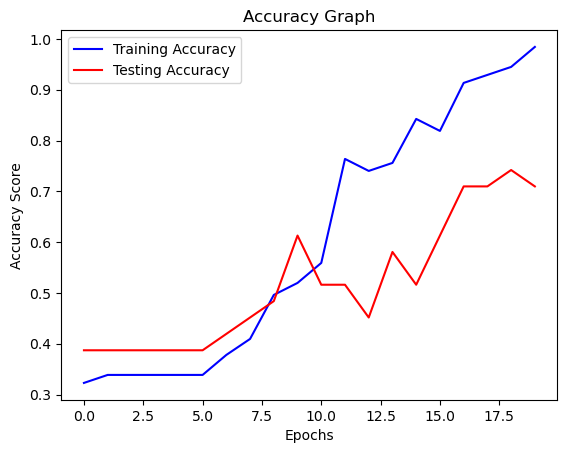

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(range(epochs),training_acc,'b',label='Training Accuracy')
plt.plot(range(epochs), testing_acc, 'r', label='Testing Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy Score')
plt.legend()
plt.savefig('accuracy.png')
plt.figure()

<Figure size 640x480 with 0 Axes>

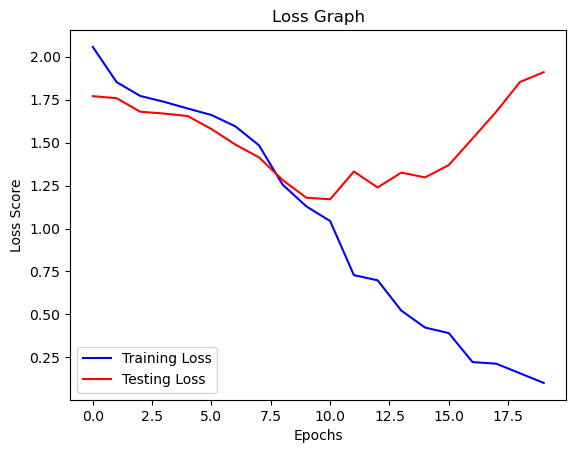

<Figure size 640x480 with 0 Axes>

In [20]:
plt.plot(range(epochs),training_loss,'b',label='Training Loss')
plt.plot(range(epochs), testing_loss, 'r', label='Testing Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss Score')
plt.legend()
plt.savefig('loss.png')
plt.figure()

# 5. Predicting with Given Images

In [21]:
class_names = ['ADA','D60LF','DE40','DE60','MAIN','XDE40','XDE60','XHE60']

In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 48ms/step


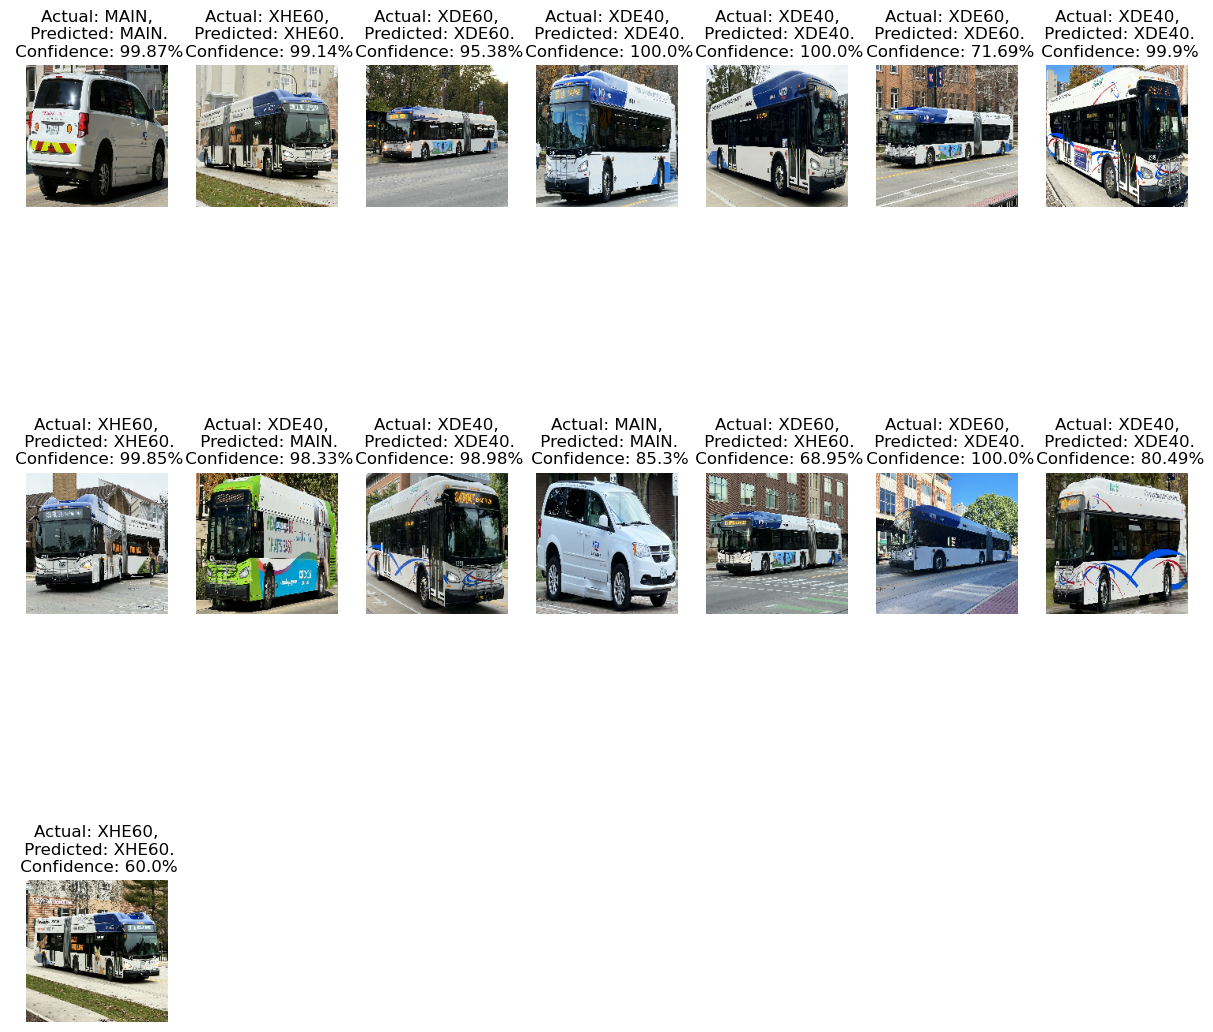

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in val_data.take(1):
    for i in range(15):
        ax = plt.subplot(3, 7, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f'Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%')
        plt.axis('off')